# Symmetric random walk on uniform distribution

In [1]:
# Example from section 29.4 & 29.6 (Fig 29.14 & 29.15) of https://www.inference.org.uk/itprnn/book.pdf
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

import matplotlib.pyplot as plt
import jax.numpy as jnp
import seaborn as sns
import os

In [5]:
pml.latexify(width_scale_factor=2.2, fig_height=2)

/home/patel_zeel/miniconda3/envs/py3713_2/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


We genereate samples from following distribution
$$
P(x)= \begin{cases}1 / 21 & x \in\{0,1,2, \ldots, 20\} \\ 0 & \text { otherwise. }\end{cases}
$$
The proposal distribution is
$$
Q\left(x^{\prime} ; x\right)= \begin{cases}1 / 2 & x^{\prime}=x \pm 1, x \in\{1,2, \ldots, 19\} \\ 1 / 2 & x' = \{0,1\}, x = 0  \\1 / 2 &x' = \{20, 19\}, x=20 \\ 0 & \text { otherwise. }\end{cases}
$$

In [6]:
# create transition matrix
prob_vect = jnp.repeat(0.5, 20)
transition_mat = jnp.diag(prob_vect, -1) + jnp.diag(prob_vect, 1)
transition_mat = transition_mat.at[0, 0].set(0.5)
transition_mat = transition_mat.at[20, 20].set(0.5)

states = [0, 1, 2, 3, 10, 100, 200, 400]
MARKER_SIZE = 2 if pml.is_latexify_enabled() else 4

In [19]:
def calculate_q_at_state_no(state_no, p_initial, transition_mat):
    transition_mat_at_state_no = jnp.linalg.matrix_power(transition_mat, state_no)
    q = jnp.matmul(transition_mat_at_state_no, p_initial)  # q = p_initial * T^n = transpose(T)^n * p_initial
    return q

In [8]:
def plot_stem(ax):
    markerline, stemlines, baseline = ax.stem(q, markerfmt="ro", linefmt="blue")
    ax.set_yticks([])
    ax.set_ylim(0, max(q) * 1.13)
    ax.set_ylabel("$p_{" + str(state_no) + "}(x)$", fontdict={"rotation": 0}, labelpad=13)
    baseline.set_linewidth(0)
    stemlines.set_linewidth(1)
    markerline.set_markersize(MARKER_SIZE)
    sns.despine()

## $x_0 = 10$

In [17]:
x_0 = 10  # initial state
p_initial = [0] * 21
p_initial[x_0] = 1
p_initial = jnp.array(p_initial)
p_initial

DeviceArray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0], dtype=int32)

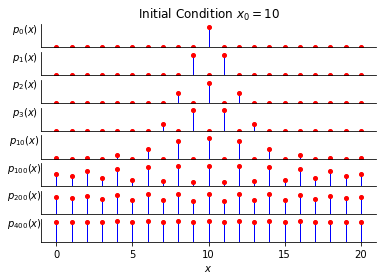

In [18]:
fig, axs = plt.subplots(len(states), 1)
axs[0].set_title(f"Initial Condition $x_0 = {x_0}$")
for ind, state_no in enumerate(states):
    q = calculate_q_at_state_no(
        state_no, p_initial, transition_mat
    )  # q is proposed probabilities for p(x) on particular markov state
    plot_stem(axs[ind])
    if state_no != states[-1]:
        axs[ind].set_xticks([])
    else:
        axs[ind].set_xticks(range(0, 21, 5))
        axs[ind].set_xlabel("$x$")

pml.savefig(f"randomWalk{x_0}")

In [16]:
print(sum(q), 1 / 21, q)

0.99999994 0.047619047619047616 [0.04665894 0.04683788 0.04656532 0.04708623 0.04656531 0.04738191
 0.04665894 0.04769868 0.04683788 0.04800836 0.04708624 0.04828346
 0.04738192 0.04849952 0.04769868 0.04863734 0.04800837 0.04868469
 0.04828347 0.04863734 0.04849952]


## $x_0 = 17$

In [11]:
x_0 = 17  # initial state
p_initial = [0] * 21
p_initial[x_0] = 1
p_initial = jnp.array(p_initial)
p_initial

DeviceArray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
             0], dtype=int32)

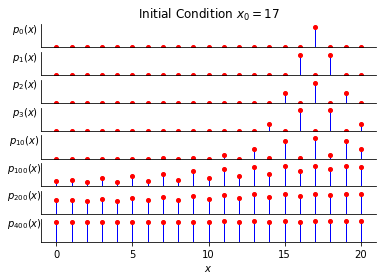

In [12]:
fig, axs = plt.subplots(len(states), 1)
axs[0].set_title(f"Initial Condition $x_0 = {x_0}$")
for ind, state_no in enumerate(states):
    ax = axs[ind]
    q = calculate_q_at_state_no(state_no, p_initial, transition_mat)
    plot_stem(ax)
    if state_no != states[-1]:
        axs[ind].set_xticks([])
    else:
        axs[ind].set_xticks(range(0, 21, 5))
        axs[ind].set_xlabel("$x$")

pml.savefig(f"randomWalk{x_0}")

In [13]:
print(sum(q), 1 / 21, q)

0.99999994 0.047619047619047616 [0.04665894 0.04683788 0.04656532 0.04708623 0.04656531 0.04738191
 0.04665894 0.04769868 0.04683788 0.04800836 0.04708624 0.04828346
 0.04738192 0.04849952 0.04769868 0.04863734 0.04800837 0.04868469
 0.04828347 0.04863734 0.04849952]
